In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [53]:
data=np.array([[2.5,2.4,1.2],
              [0.5,0.7,0.3],
              [2.2,2.9,1.4],
              [1.9,2.2,1.1],
              [3.1,3.0,1.7],
              [2.3,2.7,1.5],
              [2.0,1.6,0.9],
              [1.0,1.1,0.4],
              [1.5,1.6,0.8],
              [1.1,0.9,0.2]])
df=pd.DataFrame(data,columns=["X","Y","Z"])
df

,X,Y,Z
0,2.5,2.4,1.2
1,0.5,0.7,0.3
2,2.2,2.9,1.4
3,1.9,2.2,1.1
4,3.1,3.0,1.7
5,2.3,2.7,1.5
6,2.0,1.6,0.9
7,1.0,1.1,0.4
8,1.5,1.6,0.8
9,1.1,0.9,0.2


In [55]:
data

array([[2.5, 2.4, 1.2],
       [0.5, 0.7, 0.3],
       [2.2, 2.9, 1.4],
       [1.9, 2.2, 1.1],
       [3.1, 3. , 1.7],
       [2.3, 2.7, 1.5],
       [2. , 1.6, 0.9],
       [1. , 1.1, 0.4],
       [1.5, 1.6, 0.8],
       [1.1, 0.9, 0.2]])

In [56]:
df.loc[len(df)]=[2.0,2.4,3.4]
df

,X,Y,Z
0,2.5,2.4,1.2
1,0.5,0.7,0.3
2,2.2,2.9,1.4
3,1.9,2.2,1.1
4,3.1,3.0,1.7
5,2.3,2.7,1.5
6,2.0,1.6,0.9
7,1.0,1.1,0.4
8,1.5,1.6,0.8
9,1.1,0.9,0.2


In [57]:
data=np.append(data,[[1.8,2.0,1.0]],axis=0)
data

array([[2.5, 2.4, 1.2],
       [0.5, 0.7, 0.3],
       [2.2, 2.9, 1.4],
       [1.9, 2.2, 1.1],
       [3.1, 3. , 1.7],
       [2.3, 2.7, 1.5],
       [2. , 1.6, 0.9],
       [1. , 1.1, 0.4],
       [1.5, 1.6, 0.8],
       [1.1, 0.9, 0.2],
       [1.8, 2. , 1. ]])

In [ ]:
standardized_data=(df-df.mean())/df.std()
standardized_data

,X,Y,Z
0,0.878745,0.578857,0.477697
1,-1.668342,-1.429422,-1.242013
2,0.496682,1.169527,0.859855
3,0.114619,0.342589,0.286618
4,1.642872,1.287661,1.433092
5,0.624036,0.933259,1.050934
6,0.241973,-0.366216,-0.095539
7,-1.031570,-0.956886,-1.050934
8,-0.394799,-0.366216,-0.286618
9,-0.904216,-1.193154,-1.433092


In [ ]:
cov_matrix=np.cov(standardized_data.T)

In [ ]:
eig_vals,eig_vecs=np.linalg.eig(cov_matrix)

In [ ]:
sort_incides=np.argsort(eig_vals)[::-1]
sort_incides
eig_values=eig_vals[sort_incides]
eig_values
eig_vecs=eig_vecs[:,sort_incides]

In [ ]:
eig_vecs_subset=eig_vecs[:,:2]
eig_vecs_subset

array([[ 0.57041595,  0.81767389],
       [ 0.57969966, -0.46779003],
       [ 0.58187108, -0.33553224]])

In [ ]:
reduced_data=standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df=pd.DataFrame(reduced_data,columns=["PC1","PC2"])
display(reduced_df)


,PC1,PC2
0,1.114772,0.287461
1,-2.502976,-0.278755
2,1.461615,-0.429478
3,0.430754,-0.162708
4,2.517452,0.260130
5,1.508478,-0.278933
6,-0.129861,0.401224
7,-1.754639,-0.043244
8,-0.604269,-0.055335
9,-2.041325,0.299640


In [ ]:
print("\n Reduced Data (after PCA): \n",reduced_df)



 Reduced Data (after PCA): 
         PC1       PC2
0  1.114772  0.287461
1 -2.502976 -0.278755
2  1.461615 -0.429478
3  0.430754 -0.162708
4  2.517452  0.260130
5  1.508478 -0.278933
6 -0.129861  0.401224
7 -1.754639 -0.043244
8 -0.604269 -0.055335
9 -2.041325  0.299640


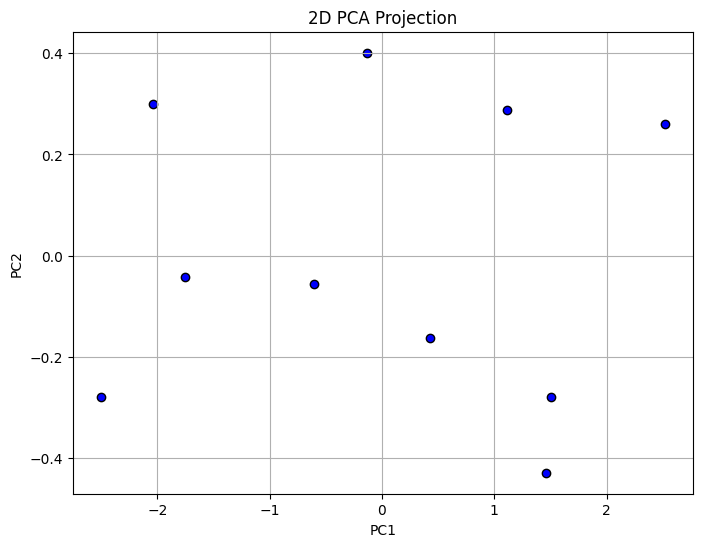

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(reduced_df['PC1'],
            reduced_df['PC2'],color='blue',edgecolor='k')
plt.title('2D PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()